## Analysis of graph structure

In this Code section, different analysis were run to investigate the common graph structure of Wikipedia.

In [1]:
# Import necessary libraries
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
import numpy as np
import requests
import random
import pickle

In [2]:
# Load the graph using NetworkX
with open("data/en_wiki_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# Plot descriptive statistics about the graph
print("----- Graph -----")
print(f"Number of Nodes smaller Graph: {G.number_of_nodes()}")
print(f"Number of Edges smaller Graph: {G.number_of_edges()}\n")

----- Graph -----
Number of Nodes smaller Graph: 4520178
Number of Edges smaller Graph: 101881676



In [3]:
def fetch_wikipedia_title(node_id, lang="en"):
    """
    Fetch the title of a Wikipedia page given its NodeID using the Wikipedia API.
    
    Parameters:
        node_id (int): The NodeID for which to fetch the title.
        lang (str): The language code for the Wikipedia API (default is 'en').
        
    Returns:
        str: The title of the Wikipedia page, or None if not found.
    """
    # Construct the URL for the Wikipedia API
    url = f"https://{lang}.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "pageids": node_id,
        "format": "json"
    }
    
    try:
        # Make the API request
        response = requests.get(url, params=params)
        response.raise_for_status()
        
        # Parse the JSON response
        data = response.json()
        pages = data.get("query", {}).get("pages", {})
        page = pages.get(str(node_id), {})
        
        # Extract the title
        title = page.get("title")
        return title
    except Exception as e:
        print(f"Error fetching title for NodeID {node_id}: {e}")
        return None

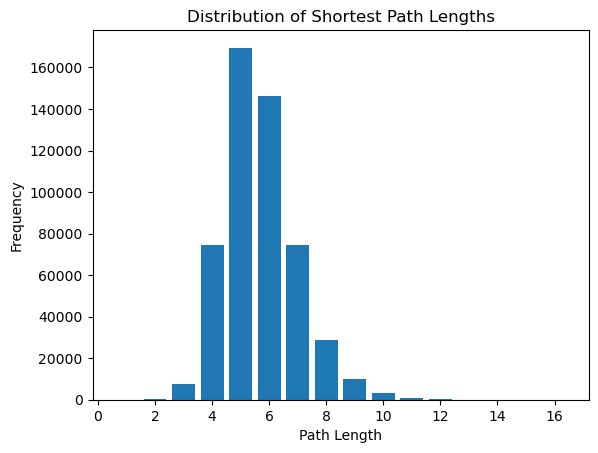

Mean path length: 5.689013572767698
Std path length: 1.2947506913092435


In [9]:
# Get all node IDs from the graph
node_ids = list(G.nodes)

# Initialize a list to store the lengths of shortest paths
path_lengths = []

# Sample 100,000 random pairs of nodes and calculate shortest path lengths
for i in range(1000000):
    # Randomly select two different nodes
    start, end = random.sample(node_ids, 2)
    try:
        # Calculate the shortest path length between the nodes
        length = nx.shortest_path_length(G, source=start, target=end)
        path_lengths.append(length)
    except nx.NetworkXNoPath:
        # Skip if no path exists between the nodes
        continue

# Plot a histogram of the shortest path lengths
plt.hist(path_lengths, bins=range(1, max(path_lengths) + 2), align="left", rwidth=0.8)
plt.title("Distribution of Shortest Path Lengths")  # Title of the plot
plt.xlabel("Path Length")  # Label for the x-axis
plt.ylabel("Frequency")  # Label for the y-axis
plt.show()  # Display the plot

# Calculate the mean and standard deviation of path lengths
mean_length = sum(path_lengths) / len(path_lengths)  # Mean path length
std_length = (sum((x - mean_length) ** 2 for x in path_lengths) / len(path_lengths)) ** 0.5  # Standard deviation

# Print the results
print(f"Mean path length: {mean_length}")
print(f"Std path length: {std_length}")

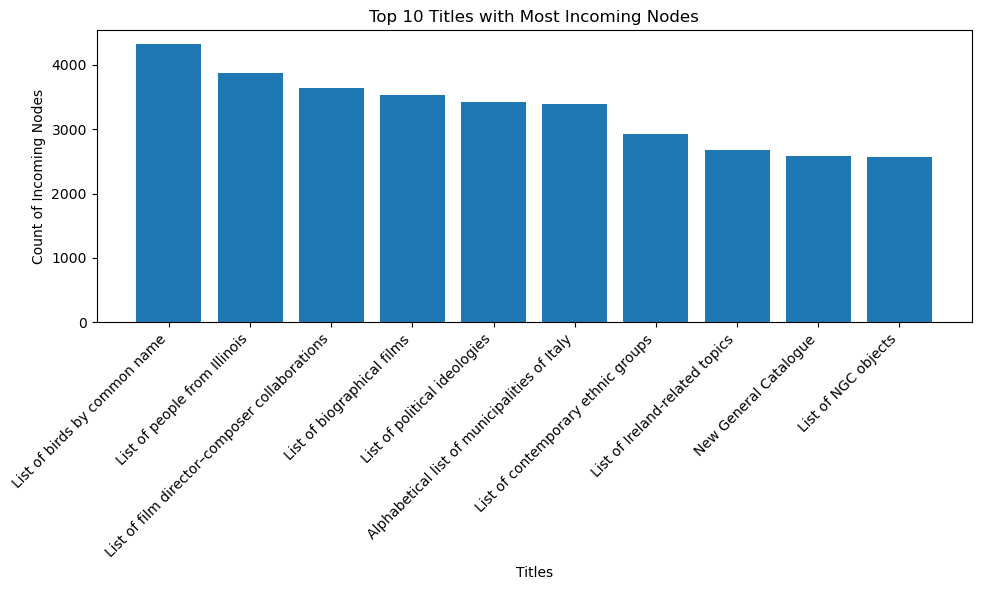

Top 10 Nodes by In-Degree:
List of birds by common name: 4316
List of people from Illinois: 3867
List of film director–composer collaborations: 3634
List of biographical films: 3521
List of political ideologies: 3414
Alphabetical list of municipalities of Italy: 3390
List of contemporary ethnic groups: 2928
List of Ireland-related topics: 2671
New General Catalogue: 2582
List of NGC objects: 2562


In [ ]:
# Calculate the in-degrees for all nodes in the graph
in_degrees = G.in_degree()

# Sort and select the top 10 nodes by in-degree
top_10_nodes = sorted(in_degrees, key=lambda x: x[1], reverse=True)[:10]

# Fetch titles for the top 10 nodes
titles_with_ids = []
for node, degree in top_10_nodes:
    title = fetch_wikipedia_title(node)
    if title:
        titles_with_ids.append((title, degree))

# Extract titles and counts
titles = [item[0] for item in titles_with_ids]
counts = [item[1] for item in titles_with_ids]

# Plot the bar chart for the top 10 nodes
plt.figure(figsize=(10, 6))
plt.bar(titles, counts)
plt.xlabel("Titles")
plt.ylabel("Count of Incoming Nodes")
plt.title("Top 10 Titles with Most Incoming Nodes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Display the top 10 nodes and their total counts
print("Top 10 Nodes by In-Degree:")
for title, count in titles_with_ids:
    print(f"{title}: {count}")

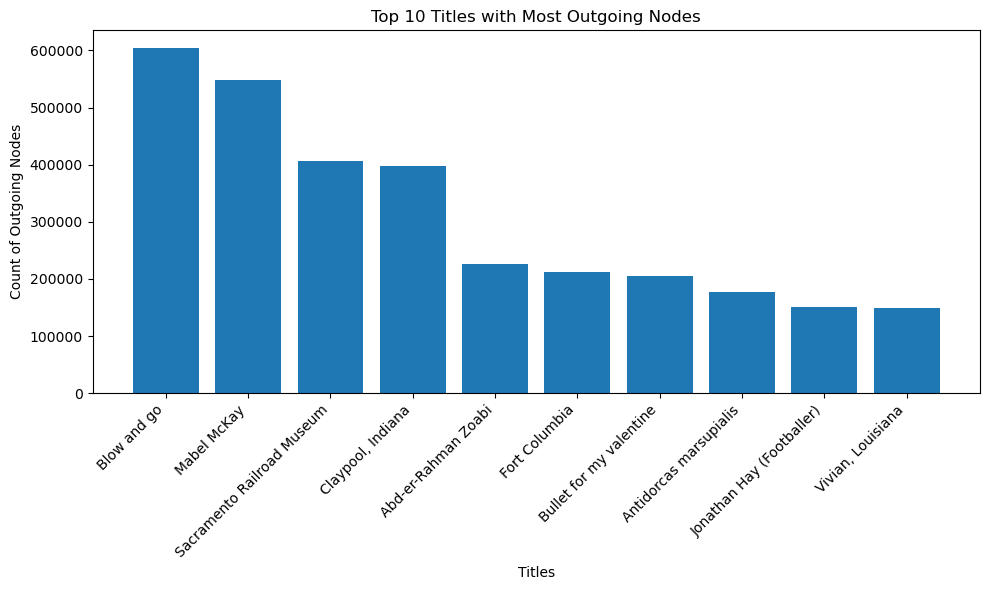

Top 10 Nodes by Out-Degree:
Blow and go: 604904
Mabel McKay: 547622
Sacramento Railroad Museum: 405747
Claypool, Indiana: 398094
Abd-er-Rahman Zoabi: 225956
Fort Columbia: 212726
Bullet for my valentine: 205440
Antidorcas marsupialis: 177496
Jonathan Hay (Footballer): 151455
Vivian, Louisiana: 149630


In [ ]:
# Calculate the out-degrees for all nodes in the graph
out_degrees = G.out_degree()

# Sort and select the top 10 nodes by out-degree
top_10_out_nodes = sorted(out_degrees, key=lambda x: x[1], reverse=True)[:10]

# Fetch titles for the top 10 nodes
out_titles_with_ids = []
for node, degree in top_10_out_nodes:
    title = fetch_wikipedia_title(node)
    if title:
        out_titles_with_ids.append((title, degree))

# Extract titles and counts
titles_out = [item[0] for item in out_titles_with_ids]
counts_out = [item[1] for item in out_titles_with_ids]

# Plot the bar chart for the top 10 nodes with the highest out-degrees
plt.figure(figsize=(10, 6))
plt.bar(titles_out, counts_out)
plt.xlabel("Titles")
plt.ylabel("Count of Outgoing Nodes")
plt.title("Top 10 Titles with Most Outgoing Nodes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Display the top 10 nodes and their total counts
print("Top 10 Nodes by Out-Degree:")
for title, count in out_titles_with_ids:
    print(f"{title}: {count}")

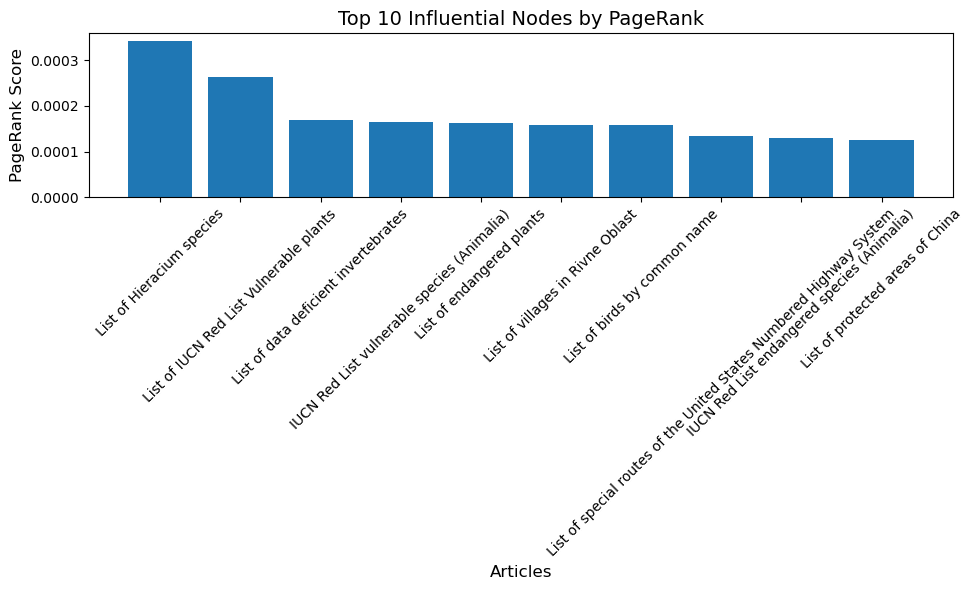

Top 10 Nodes by PageRank:
List of Hieracium species: 0.00034155363223920893
List of IUCN Red List Vulnerable plants: 0.00026335162400920525
List of data deficient invertebrates: 0.00016939269888271747
IUCN Red List vulnerable species (Animalia): 0.00016502481885762775
List of endangered plants: 0.00016336843045200192
List of villages in Rivne Oblast: 0.00015868677844387965
List of birds by common name: 0.0001572738760130631
List of special routes of the United States Numbered Highway System: 0.0001329192699501502
IUCN Red List endangered species (Animalia): 0.0001301924351772551
List of protected areas of China: 0.00012594485576812212


In [9]:
# Compute PageRank scores
pagerank_scores = nx.pagerank(G)

# Prepare data for title fetching and visualization
top_pagerank_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Fetch titles for top nodes
top_pagerank_with_titles = []
for node_id, score in top_pagerank_nodes:
    title = fetch_wikipedia_title(node_id)
    if title:
        top_pagerank_with_titles.append((node_id, title, score))

# Convert to a DataFrame for better readability
result_df = pd.DataFrame(top_pagerank_with_titles, columns=["NodeID", "Titel", "PageRank"])

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_df["Titel"], result_df["PageRank"], align="center")
plt.title("Top 10 Influential Nodes by PageRank", fontsize=14)
plt.xlabel("Articles", fontsize=12)
plt.ylabel("PageRank Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Display the top 10 nodes and their total counts
print("Top 10 Nodes by PageRank:")
for index, row in result_df.iterrows():
    print(f"{row['Titel']}: {row['PageRank']}")

Analyzing Shortest Paths: 100%|██████████| 10000000/10000000 [42:51<00:00, 3888.51it/s]


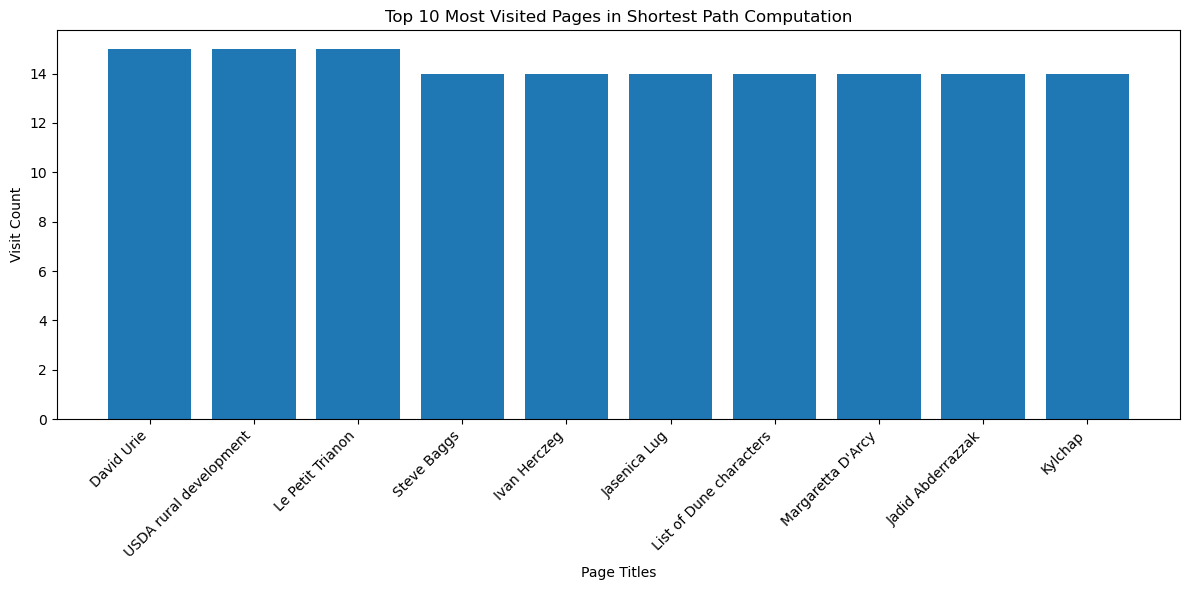

Top 10 Nodes in Shortest Path Computation:
David Urie: 15
USDA rural development: 15
Le Petit Trianon: 15
Steve Baggs: 14
Ivan Herczeg: 14
Jasenica Lug: 14
List of Dune characters: 14
Margaretta D'Arcy: 14
Jadid Abderrazzak: 14
Kylchap: 14


In [4]:
# Get all node IDs from the graph
node_ids = list(G.nodes)

# Initialize lists to track visited nodes and path lengths
visited_nodes = []  # List to track node visit frequency
path_lengths = []  # List to store shortest path lengths

# Perform shortest path calculations for 1,000,000 random pairs of nodes
for i in tqdm(range(10000000), desc="Analyzing Shortest Paths"):
    # Randomly sample two different nodes
    start, end = random.sample(node_ids, 2)
    try:
        # Calculate the shortest path length between the nodes
        length = nx.shortest_path_length(G, source=start, target=end)
        path_lengths.append(length)
        # Track visits to the start and end nodes
        visited_nodes.extend([start, end])
    except nx.NetworkXNoPath:
        # Skip if no path exists between the nodes
        continue

# Count how often each node was visited during the analysis
node_visit_counts = Counter(visited_nodes)

# Get the top 10 most visited nodes and their visit counts
top_10_visited = node_visit_counts.most_common(10)

# Fetch titles for the top 10 most visited nodes
top_10_names = []
for node_id, count in top_10_visited:
    title = fetch_wikipedia_title(node_id)
    if title:
        top_10_names.append((title, count))

# Extract titles and counts for visualization
titles = [title for title, count in top_10_names]
counts = [count for title, count in top_10_names]

# Plot a bar chart of the top 10 most visited nodes
plt.figure(figsize=(12, 6))
plt.bar(titles, counts)
plt.title("Top 10 Most Visited Pages in Shortest Path Computation")
plt.xlabel("Page Titles")
plt.ylabel("Visit Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Display the top 10 nodes and their total counts
print("Top 10 Nodes in Shortest Path Computation:")
for title, count in top_10_names:
    print(f"{title}: {count}")

In [ ]:
def compute_mean_path_lengths(G, max_steps=10, remove_top_n=1000, sample_size=10000):
    """
    Computes the average shortest path lengths in the graph.

    Args:
        G (networkx.Graph): The input graph.
        max_steps (int): Maximum number of iterations (steps).
        remove_top_n (int): Number of top-ranked nodes to remove per step based on PageRank.
        sample_size (int): Number of random node pairs for shortest path length computation.

    Returns:
        list: A list of tuples containing (average path length, remaining node count) for each step.
    """
    # Create a copy of the graph to avoid modifying the original
    G_copy = G.copy()
    results = []

    print(f"Initial number of nodes in the graph: {len(G_copy.nodes)}")
    
    # Iterate for a maximum number of steps
    for step in range(max_steps):
        print(f"Step {step + 1}/{max_steps}")
        
        # Stop if the graph has fewer nodes than the number to be removed
        if len(G_copy.nodes) <= remove_top_n:
            print("Stopping: Not enough nodes to proceed with removal.")
            break

        # Compute PageRank for all nodes in the graph
        print("Computing PageRank...")
        page_rank = nx.pagerank(G_copy)

        # Get the top-ranked nodes to remove based on PageRank
        top_nodes = sorted(page_rank, key=page_rank.get, reverse=True)[:remove_top_n]

        # Remove the top-ranked nodes from the graph
        G_copy.remove_nodes_from(top_nodes)
        print(f"Removed {remove_top_n} top-ranked nodes. Remaining nodes: {len(G_copy.nodes)}")

        # Get the list of remaining node IDs in the graph
        node_ids = list(G_copy.nodes)

        # Compute shortest path lengths between random pairs of nodes
        print("Calculating shortest path lengths...")
        path_lengths = []
        for _ in tqdm(range(sample_size), desc="Sampling node pairs"):
            # Skip if fewer than two nodes remain
            if len(node_ids) < 2:
                print("Not enough nodes remaining for path computation.")
                break

            # Randomly select two nodes
            start, end = random.sample(node_ids, 2)
            try:
                # Calculate the shortest path length
                length = nx.shortest_path_length(G_copy, source=start, target=end)
                path_lengths.append(length)
            except nx.NetworkXNoPath:
                # Skip if no path exists between the nodes
                continue

        # Compute the mean path length if there are valid paths
        if path_lengths:
            mean_length = np.mean(path_lengths)
            results.append((mean_length, len(G_copy.nodes)))
            print(f"Average path length: {mean_length:.2f}, Nodes remaining: {len(G_copy.nodes)}")
        else:
            print("No valid paths exist in the graph. Terminating.")
            break

    print(f"Process completed after {len(results)} steps.")
    return results

Initial number of nodes in the graph: 4520178
Step 1/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4510178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [13:31<00:00, 1231.63it/s]


Average path length: 5.63, Nodes remaining: 4510178
Step 2/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4500178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [16:39<00:00, 1000.13it/s]


Average path length: 5.68, Nodes remaining: 4500178
Step 3/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4490178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [18:00<00:00, 925.80it/s]


Average path length: 5.71, Nodes remaining: 4490178
Step 4/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4480178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [18:55<00:00, 880.73it/s]


Average path length: 5.73, Nodes remaining: 4480178
Step 5/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4470178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [20:12<00:00, 824.78it/s]


Average path length: 5.76, Nodes remaining: 4470178
Step 6/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4460178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [20:42<00:00, 805.02it/s]


Average path length: 5.77, Nodes remaining: 4460178
Step 7/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4450178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:10<00:00, 787.02it/s]


Average path length: 5.81, Nodes remaining: 4450178
Step 8/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4440178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:22<00:00, 779.54it/s]


Average path length: 5.85, Nodes remaining: 4440178
Step 9/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4430178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:32<00:00, 773.59it/s]


Average path length: 5.87, Nodes remaining: 4430178
Step 10/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4420178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:25<00:00, 778.02it/s]


Average path length: 5.89, Nodes remaining: 4420178
Step 11/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4410178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:25<00:00, 777.68it/s]


Average path length: 5.93, Nodes remaining: 4410178
Step 12/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4400178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:14<00:00, 784.52it/s]


Average path length: 5.95, Nodes remaining: 4400178
Step 13/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4390178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:12<00:00, 785.84it/s]


Average path length: 5.97, Nodes remaining: 4390178
Step 14/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4380178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:16<00:00, 783.10it/s]


Average path length: 5.99, Nodes remaining: 4380178
Step 15/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4370178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:13<00:00, 785.11it/s]


Average path length: 6.02, Nodes remaining: 4370178
Step 16/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4360178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [21:09<00:00, 787.77it/s]


Average path length: 6.05, Nodes remaining: 4360178
Step 17/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4350178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [18:23<00:00, 905.82it/s]


Average path length: 6.08, Nodes remaining: 4350178
Step 18/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4340178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [18:05<00:00, 920.95it/s]


Average path length: 6.11, Nodes remaining: 4340178
Step 19/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4330178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [17:38<00:00, 944.30it/s]


Average path length: 6.13, Nodes remaining: 4330178
Step 20/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4320178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [17:32<00:00, 950.53it/s]


Average path length: 6.16, Nodes remaining: 4320178
Step 21/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4310178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [17:21<00:00, 960.31it/s]


Average path length: 6.18, Nodes remaining: 4310178
Step 22/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4300178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [16:55<00:00, 984.79it/s]


Average path length: 6.22, Nodes remaining: 4300178
Step 23/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4290178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [16:21<00:00, 1019.22it/s]


Average path length: 6.25, Nodes remaining: 4290178
Step 24/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4280178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [16:09<00:00, 1031.50it/s]


Average path length: 6.28, Nodes remaining: 4280178
Step 25/25
Computing PageRank...
Removed 10000 top-ranked nodes. Remaining nodes: 4270178
Calculating shortest path lengths...


Sampling node pairs: 100%|██████████| 1000000/1000000 [16:05<00:00, 1035.23it/s]


Average path length: 6.31, Nodes remaining: 4270178
Process completed after 25 steps.


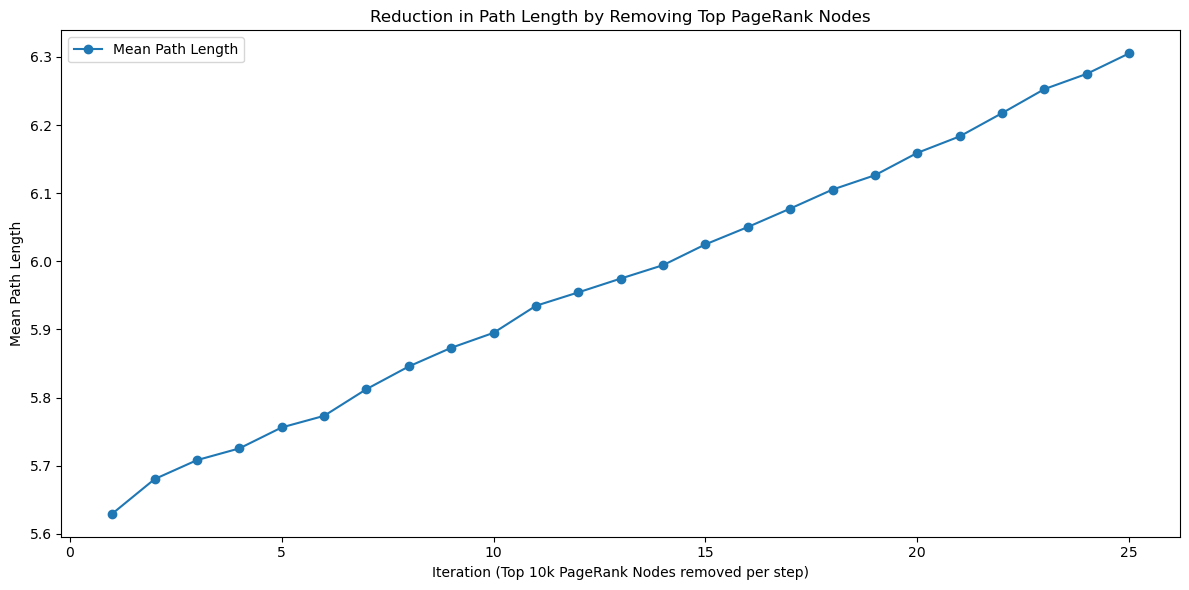

In [6]:
# Run the analysis for 50 steps while removing the top 100 nodes per step
results = compute_mean_path_lengths(G, max_steps=25, remove_top_n=10000, sample_size=1000000)

# Extract results
means, remaining_nodes = zip(*results)
x_vals = range(1, len(means) + 1)

# Plot Mean Path Length
plt.figure(figsize=(12, 6))
plt.plot(x_vals, means, '-o', label="Mean Path Length")
plt.xlabel("Iteration (Top 10k PageRank Nodes removed per step)")
plt.ylabel("Mean Path Length")
plt.title("Reduction in Path Length by Removing Top PageRank Nodes")
plt.legend()
plt.tight_layout()
plt.show()